In [3]:
import numpy as np
np.random.seed(1000)
import scipy.stats as scs
import statsmodels.api as sm
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

/Users/bcutrell/anaconda3/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [4]:
def gen_paths(S0, r, sigma, T, M, I):
    ''' 
        generates monte carlo paths for geometric brownian motion
        S0 = initial stock/index value
        r = constant short rate
        sigma = constant volatility
        T = final time horizon
        M = number of time steps/intervals
        I = number of paths to be simulated
    '''
    dt = float(T) / M
    paths = np.zeros((M+1, I), np.float64)
    paths[0] = 50
    for t in range(1, M+1):
        rand = np.random.standard_normal(I)
        rand = (rand - rand.mean()) / rand.std()
        paths[t] = paths[t-1] * np.exp((r-0.5 * sigma ** 2) * dt + sigma * np.sqrt(dt) * rand)
    return paths

In [5]:
S0 = 100
r = 0.05
sigma = 0.2
T = 1.0
M = 50
I = 250000
paths = gen_paths(S0, r, sigma, T, M, I)

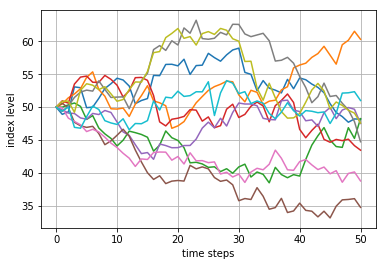

In [6]:
# shows first 10 simulated paths
plt.plot(paths[:, :10])
plt.grid(True)
plt.xlabel('time steps')
plt.ylabel('index level')

In [9]:
def print_statistics(array):
    sta = scs.describe(array)
    print('%14s %15s' % ('statistic', 'value'))
    print(30 * '-')
    print("%14s %15s" % ('size', sta[0])
    print("%14s %15s" % 'min', sta[1][0])
    print("%14s %15s" % 'max', sta[1][1])
    print("%14s %15s" % 'mean', sta[2])
    print("%14s %15s" % 'std', np.sqrt(sta[3]))
    print("%14s %15s" % 'skew', sta[4])
    print("%14s %15s" % 'kurtosis', sta[5])

In [8]:
log_returns = np.log(paths[1:] / paths[0:-1])

In [10]:
print_statistics(log_returns.flatten())

     statistic           value
------------------------------


TypeError: not enough arguments for format string